In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator, smart_resize, DirectoryIterator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_dir = "../data/Images"

# Setting path to the training directory
train_dir = os.path.join(main_dir, 'train')

# Setting path to the test directory
test_dir = os.path.join(main_dir, 'val')

# Directory with train animal_crossing images
train_ac_dir = os.path.join(train_dir, 'animal_crossing')

# Directory with train Doom images
train_doom_dir = os.path.join(train_dir, 'doom')

# Directory with test animal_crossing image
test_ac_dir = os.path.join(test_dir, 'animal_crossing')

# Directory with test doom image
test_doom_dir = os.path.join(test_dir, 'doom')

# Creating a list of filenames in each directory
train_ac_names = os.listdir(train_ac_dir)
print(train_ac_names[:10])  # printing a list of the first 10 filenames

train_doom_names = os.listdir(train_doom_dir)
print(train_doom_names[:10])

test_ac_names = os.listdir(test_ac_dir)
print(test_ac_names[:10])

test_doom_names = os.listdir(test_doom_dir)
print(test_doom_names[:10])

# Printing total number of images present in each set
print('Total no of images in training set:', len(train_ac_names
                                                + train_doom_names))
print("Total no of images in test set:", len(test_ac_names
                                            + test_doom_names))

['manh6kzaxm051.jpg', 'yutte0d7fn151.png', 'wiyl0tl0n8r41.jpg', 'lxdsmtwgb9x41.jpg', '0d95wo29cl051.jpg', 'sgch1t0ubfu41.jpg', 'kdma33kq3l051.jpg', 'lnl5o58dcow41.jpg', '3ffya37h56v41.jpg', 'kzabkt8igdu41.jpg']
['i8m7jw1p49x31.jpg', '72twsly4v7i41.jpg', '6mfhsgu63hx41.jpg', 'mbgapc4q9js41.jpg', 'numuacocm9931.jpg', 'h5ji97z44hs41.png', '1snibvl6zpp41.jpg', '2jawonnlz6s41.png', 'izbtuqy7ybl41.jpg', 'jk1lza5gw3h41.jpg']
['t1u2dgqe8sp41.jpg', '5yu10oi529u41.jpg', 'wgwa7ynh4au41.jpg', 'b5x6s7la21v41.jpg', 'jqzzyw1w8ms41.jpg', 'zergm3hguss41.jpg', 'ufmdogx78lx41.jpg', 'jappvd4wmbt41.jpg', 'fbhxzlep62251.jpg', 'll7xid3fqmu41.jpg']
['etqyw0pbk1u41.jpg', 'of5t94mga4i21.jpg', 'ugzimfspx2p41.jpg', 'fw1xeqqqnzl31.jpg', 'pp338396rcz41.jpg', 'g26xfqqcein41.jpg', '1kunist4yeq31.jpg', 'jb2x2o4tfim41.png', '60m316tz31741.jpg', 'rbq9w51b88o41.png']
Total no of images in training set: 1436
Total no of images in test set: 161


In [3]:
# Data Visualization
import matplotlib.image as mpimg
# Setting the no of rows and columns
ROWS = 4
COLS = 4
# Setting the figure size
fig = plt.gcf()
# get current figure; allows us to get a reference to current figure when using pyplot
fig.set_size_inches(12, 12)
# get the directory to each image file in the trainset
ac_pic = [os.path.join(train_ac_dir, filename) for filename in train_ac_names[:8]]
doom_pic = [os.path.join(train_doom_dir, filename) for filename in train_doom_names[:8]]
print(ac_pic)
print(doom_pic)
# merge ac and doom lists
merged_list = ac_pic + doom_pic
print(merged_list)

['../data/Images/train/animal_crossing/manh6kzaxm051.jpg', '../data/Images/train/animal_crossing/yutte0d7fn151.png', '../data/Images/train/animal_crossing/wiyl0tl0n8r41.jpg', '../data/Images/train/animal_crossing/lxdsmtwgb9x41.jpg', '../data/Images/train/animal_crossing/0d95wo29cl051.jpg', '../data/Images/train/animal_crossing/sgch1t0ubfu41.jpg', '../data/Images/train/animal_crossing/kdma33kq3l051.jpg', '../data/Images/train/animal_crossing/lnl5o58dcow41.jpg']
['../data/Images/train/doom/i8m7jw1p49x31.jpg', '../data/Images/train/doom/72twsly4v7i41.jpg', '../data/Images/train/doom/6mfhsgu63hx41.jpg', '../data/Images/train/doom/mbgapc4q9js41.jpg', '../data/Images/train/doom/numuacocm9931.jpg', '../data/Images/train/doom/h5ji97z44hs41.png', '../data/Images/train/doom/1snibvl6zpp41.jpg', '../data/Images/train/doom/2jawonnlz6s41.png']
['../data/Images/train/animal_crossing/manh6kzaxm051.jpg', '../data/Images/train/animal_crossing/yutte0d7fn151.png', '../data/Images/train/animal_crossing/wiy

<Figure size 864x864 with 0 Axes>

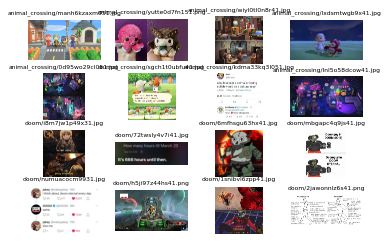

In [4]:
# Plotting the images in the merged list
for i, img_path in enumerate(merged_list):
    # getting the filename from the directory
    data = img_path.split('/', 4)[4]
    # creating a subplot of images with the no. of rows and colums with index no
    sp = plt.subplot(ROWS, COLS, i+1)
    # turn off axis
    sp.axis('Off')
    # reading the image data to an array
    img = mpimg.imread(img_path)
    # setting title of plot as the filename
    sp.set_title(data, fontsize=6)
    # displaying data as image
    plt.imshow(img, cmap='viridis')
    
plt.show()  # display the plot


In [5]:
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
dgen_validation = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)


TARGET_SIZE = (200, 200)
BATCH_SIZE = 1
CLASS_MODE = 'binary'


train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=TARGET_SIZE,
                                                 subset='training',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode=CLASS_MODE)

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size=TARGET_SIZE,
                                                      subset='validation',
                                                      batch_size=BATCH_SIZE,
                                                      class_mode=CLASS_MODE)
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode=CLASS_MODE)

Found 1149 images belonging to 2 classes.
Found 287 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


In [6]:
# Get the class indices
train_generator.class_indices

{'animal_crossing': 0, 'doom': 1}

In [7]:
# Get the image shape
train_generator.image_shape

(200, 200, 3)

**PCA**

In [8]:
train_df = pd.DataFrame()
for _ in range(train_generator.n):
    img, label = train_generator.next()
    img = img.reshape(1,-1)
    feat_labels = ["Pixel_"+str(i) for i in range(img.shape[1])]
    data = {name:pix for name,pix in zip(feat_labels, img[0])}
    data['label'] = int(label[0])
    train_df = train_df.append(data, ignore_index=True)
print("Training Set Flattened")

Training Set Flattened


In [9]:
train_df.label.describe()

count    1149.000000
mean        0.529156
std         0.499367
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_df.iloc[:,:-1])

In [11]:
principal_Df = pd.DataFrame(data = principalComponents,
                                 columns = ['principal component 1', 'principal component 2'])
principal_Df['y'] = train_df['label']

In [12]:
print("Explained variation per principal component: {}".format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.37938019 0.07035445]


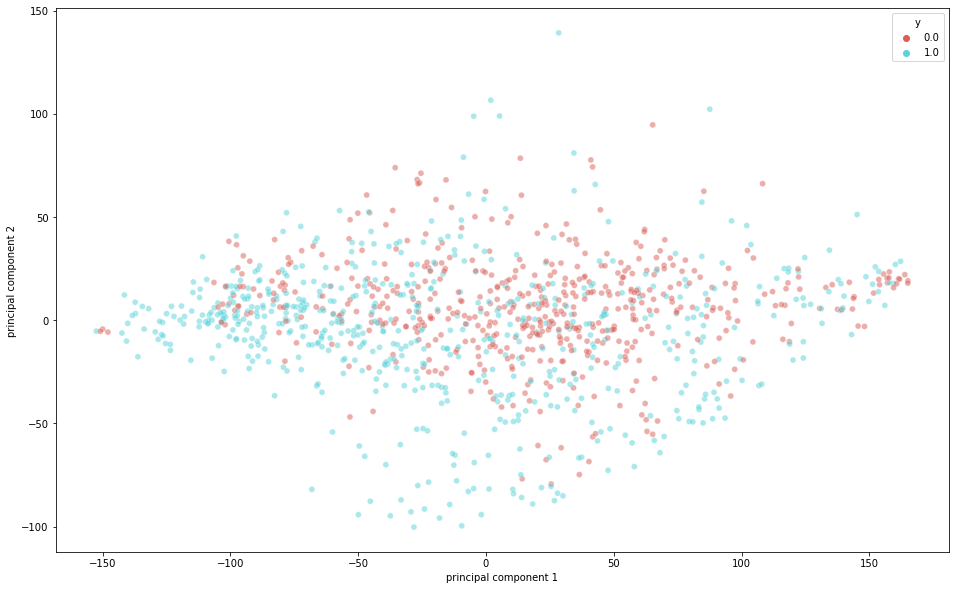

In [13]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue='y',
    palette=sns.color_palette("hls",2),
    data=principal_Df,
    legend="full",
    alpha=0.5
)
plt.savefig('pca.png', dpi=300)

In [14]:
val_df = pd.DataFrame()
for _ in range(validation_generator.n):
    img, label = validation_generator.next()
    img = img.reshape(1,-1)
    feat_labels = ["Pixel_"+str(i) for i in range(img.shape[1])]
    data = {name:pix for name,pix in zip(feat_labels, img[0])}
    data['label'] = int(label[0])
    val_df = val_df.append(data, ignore_index=True)
print("Validation Set Flattened")

Validation Set Flattened


# ML using PCA

In [15]:
pca = PCA(0.9)

In [16]:
X_train_flat = train_df.iloc[:,:-1]

In [17]:
pca.fit(X_train_flat)

PCA(n_components=0.9)

In [18]:
X_val_flat = val_df.iloc[:,:-1]

In [19]:
train_img_pca = pca.transform(X_train_flat)
val_img_pca = pca.transform(X_val_flat)

In [20]:
y_train = np_utils.to_categorical(train_df['label'])
y_val = np_utils.to_categorical(val_df['label'])

In [21]:
# Define hyperparameters
batch_size = 128
num_classes = 2
epochs = 20

In [22]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(pca.n_components_,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              302080    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 2,008,322
Trainable params: 2,008,322
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

history = model.fit(train_img_pca, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(val_img_pca, y_val))

Epoch 1/20
9/9 [==============================] - 1s 33ms/step - loss: 14.9359 - accuracy: 0.4927 - val_loss: 0.6130 - val_accuracy: 0.7003
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 0.5673 - accuracy: 0.7339 - val_loss: 0.5978 - val_accuracy: 0.7073
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 0.5101 - accuracy: 0.7249 - val_loss: 0.9756 - val_accuracy: 0.5819
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 0.5719 - accuracy: 0.7409 - val_loss: 0.7568 - val_accuracy: 0.6725
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3732 - accuracy: 0.8246 - val_loss: 0.6482 - val_accuracy: 0.7003
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 0.4829 - accuracy: 0.7922 - val_loss: 0.6490 - val_accuracy: 0.6794
Epoch 7/20
9/9 [==============================] - 0s 5ms/step - loss: 0.2685 - accuracy: 0.9101 - val_loss: 1.1104 - val_accuracy: 0.6411
Epoch 8/20
9/9 [================

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

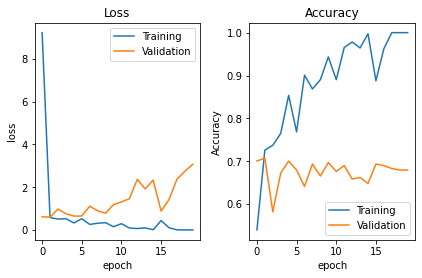

In [26]:
fig, axes = plt.subplots(1,2)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].legend(['Training', 'Validation'])
axes[0].set(xlabel = 'epoch', ylabel = 'loss', title='Loss')
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].legend(['Training', 'Validation'])
axes[1].set(xlabel = 'epoch', ylabel = 'Accuracy', title='Accuracy')
plt.tight_layout(pad = 1.2)
plt.savefig('keraslinearpca.png', dpi=300)

# Evaluation

In [27]:
test_df = pd.DataFrame()
for _ in range(test_generator.n):
    img, label = test_generator.next()
    img = img.reshape(1,-1)
    feat_labels = ["Pixel_"+str(i) for i in range(img.shape[1])]
    data = {name:pix for name,pix in zip(feat_labels, img[0])}
    data['label'] = int(label[0])
    test_df = test_df.append(data, ignore_index=True)
print("Test Set Flattened")

Test Set Flattened


In [28]:
X_test_flat, y_test = test_df.iloc[:,:-1], np_utils.to_categorical(test_df['label'])

In [29]:
test_img_pca = pca.transform(X_test_flat)

In [30]:
model.evaluate(test_img_pca, y_test,batch_size=batch_size)

3/3 [==============================] - 0s 2ms/step - loss: 2.6647 - accuracy: 0.7073


[2.6647307872772217, 0.707317054271698]

# On Full Data

In [31]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(120000,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(X_val_flat, y_val))

Epoch 1/20
9/9 [==============================] - 2s 126ms/step - loss: 500.0072 - accuracy: 0.5379 - val_loss: 29.5031 - val_accuracy: 0.4704
Epoch 2/20
9/9 [==============================] - 1s 92ms/step - loss: 16.7768 - accuracy: 0.5141 - val_loss: 12.9730 - val_accuracy: 0.5296
Epoch 3/20
9/9 [==============================] - 1s 90ms/step - loss: 9.1807 - accuracy: 0.5143 - val_loss: 17.9164 - val_accuracy: 0.4704
Epoch 4/20
9/9 [==============================] - 1s 92ms/step - loss: 8.2047 - accuracy: 0.5185 - val_loss: 9.1834 - val_accuracy: 0.5296
Epoch 5/20
9/9 [==============================] - 1s 91ms/step - loss: 6.5915 - accuracy: 0.5265 - val_loss: 1.3824 - val_accuracy: 0.4704
Epoch 6/20
9/9 [==============================] - 1s 92ms/step - loss: 0.9996 - accuracy: 0.5256 - val_loss: 1.5610 - val_accuracy: 0.4843
Epoch 7/20
9/9 [==============================] - 1s 90ms/step - loss: 1.4812 - accuracy: 0.5570 - val_loss: 3.8514 - val_accuracy: 0.4704
Epoch 8/20
9/9 [====

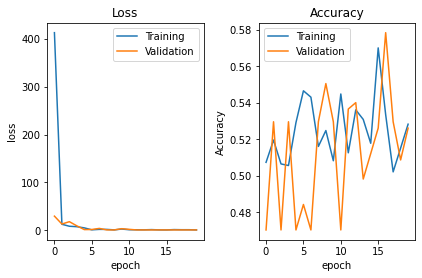

In [32]:
fig, axes = plt.subplots(1,2)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].legend(['Training', 'Validation'])
axes[0].set(xlabel = 'epoch', ylabel = 'loss', title='Loss')
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].legend(['Training', 'Validation'])
axes[1].set(xlabel = 'epoch', ylabel = 'Accuracy', title='Accuracy')
plt.tight_layout(pad = 1.2)
plt.savefig('keraslinear.png', dpi=300)

# Evaluation

In [33]:
model.evaluate(X_test_flat, y_test,batch_size=batch_size)

3/3 [==============================] - 0s 21ms/step - loss: 0.6708 - accuracy: 0.5331


[0.6707820892333984, 0.5331010222434998]

# Adding Dropout

In [34]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(pca.n_components_,)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              302080    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)              

In [36]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

history = model.fit(train_img_pca, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(val_img_pca, y_val))

Epoch 1/20
9/9 [==============================] - 1s 29ms/step - loss: 6.6854 - accuracy: 0.5346 - val_loss: 0.6444 - val_accuracy: 0.5923
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 1.2908 - accuracy: 0.5502 - val_loss: 0.6197 - val_accuracy: 0.6934
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 1.0850 - accuracy: 0.5862 - val_loss: 0.6079 - val_accuracy: 0.6864
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 1.0273 - accuracy: 0.5978 - val_loss: 0.5968 - val_accuracy: 0.6934
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 0.7932 - accuracy: 0.6436 - val_loss: 0.6030 - val_accuracy: 0.6899
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 0.8876 - accuracy: 0.6151 - val_loss: 0.5964 - val_accuracy: 0.6794
Epoch 7/20
9/9 [==============================] - 0s 5ms/step - loss: 0.7846 - accuracy: 0.6304 - val_loss: 0.6020 - val_accuracy: 0.7317
Epoch 8/20
9/9 [=================

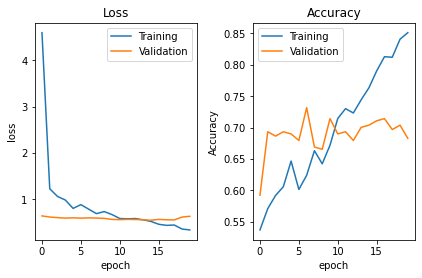

In [37]:
fig, axes = plt.subplots(1,2)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].legend(['Training', 'Validation'])
axes[0].set(xlabel = 'epoch', ylabel = 'loss', title='Loss')
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].legend(['Training', 'Validation'])
axes[1].set(xlabel = 'epoch', ylabel = 'Accuracy', title='Accuracy')
plt.tight_layout(pad = 1.2)
plt.savefig('kerasLinearPcaDrop.png', dpi=300)

In [38]:
model.evaluate(test_img_pca, y_test,batch_size=batch_size)

3/3 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.7143


[0.5945336818695068, 0.7142857313156128]

# Full Data Dropout

In [39]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(120000,)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              122881024 
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)              

In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(X_val_flat, y_val))

Epoch 1/20
9/9 [==============================] - 2s 135ms/step - loss: 275.3737 - accuracy: 0.5146 - val_loss: 4.8415 - val_accuracy: 0.5296
Epoch 2/20
9/9 [==============================] - 1s 91ms/step - loss: 17.8640 - accuracy: 0.5142 - val_loss: 5.0291 - val_accuracy: 0.4704
Epoch 3/20
9/9 [==============================] - 1s 91ms/step - loss: 7.6865 - accuracy: 0.4883 - val_loss: 0.7085 - val_accuracy: 0.5122
Epoch 4/20
9/9 [==============================] - 1s 91ms/step - loss: 3.2084 - accuracy: 0.5147 - val_loss: 0.6982 - val_accuracy: 0.5226
Epoch 5/20
9/9 [==============================] - 1s 91ms/step - loss: 0.8516 - accuracy: 0.5215 - val_loss: 0.6951 - val_accuracy: 0.5366
Epoch 6/20
9/9 [==============================] - 1s 94ms/step - loss: 0.9206 - accuracy: 0.4939 - val_loss: 0.6876 - val_accuracy: 0.5192
Epoch 7/20
9/9 [==============================] - 1s 93ms/step - loss: 0.7684 - accuracy: 0.4983 - val_loss: 0.6922 - val_accuracy: 0.5331
Epoch 8/20
9/9 [=======

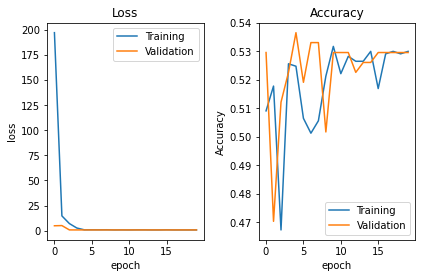

In [42]:
fig, axes = plt.subplots(1,2)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].legend(['Training', 'Validation'])
axes[0].set(xlabel = 'epoch', ylabel = 'loss', title='Loss')
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].legend(['Training', 'Validation'])
axes[1].set(xlabel = 'epoch', ylabel = 'Accuracy', title='Accuracy')
plt.tight_layout(pad = 1.2)
plt.savefig('kerasLinearDrop.png', dpi=300)

In [43]:
model.evaluate(X_test_flat, y_test,batch_size=batch_size)

3/3 [==============================] - 0s 21ms/step - loss: 0.6912 - accuracy: 0.5296


[0.6911742687225342, 0.5296167135238647]